<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [431]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [432]:
df = pd.read_csv('data.csv', skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [434]:
categorical = [column for column in df.columns if df[column].dtype == object]
print('Dane tektowe zawierają kolumny :\n\n', categorical)

numerical = [column for column in df.columns if df[column].dtype == int]
print('Dane tektowe zawierają kolumny :\n\n', categorical)

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [435]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [436]:
for var in categorical:
    print(var, '\n', df[var].unique())

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex 
 ['Male' 'Female']
native_country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'En

In [437]:
for column in categorical:
    df[column].replace('?', np.NaN, inplace=True)

In [438]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [439]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [440]:
for var in numerical:
    print(var, '\n', df[var].unique())

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302]
education_num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
capital_gain 
 [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936

In [441]:
for column in numerical:
    df[column].replace('?', np.NaN, inplace=True)

In [442]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [443]:
X = df.drop(['income'], axis=1)
Y = df['income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

categorical = [column for column in X_train.columns if X_train[column].dtypes == object]

for column in categorical:
    if X_train[column].isnull().mean() > 0:
        for data_frame in [X_train, X_test]:
            data_frame[column].fillna(X_train[column].mode()[0], inplace=True)

for data_frame in [Y_train, Y_test]:
    data_frame.fillna(Y_train.mode()[0], inplace=True)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [444]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: Future

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [445]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [446]:
columns = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[columns])
X_test = pd.DataFrame(X_test, columns=[columns])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [447]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
Y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [448]:
Y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

In [449]:
null_hypothesis = 7407 / Y_test.value_counts().sum()

print('Model accuracy for training data {:.4f}'.format(gnb.score(X_train, Y_train)))
print('Model accuracy for test data: {:.4f}'.format(gnb.score(X_test, Y_test)))
print('Accuracy of the null hypothesis: {0:0.4f}'.format(null_hypothesis))

Model accuracy for training data 0.8067
Model accuracy for test data: 0.8083
Accuracy of the null hypothesis: 0.7582


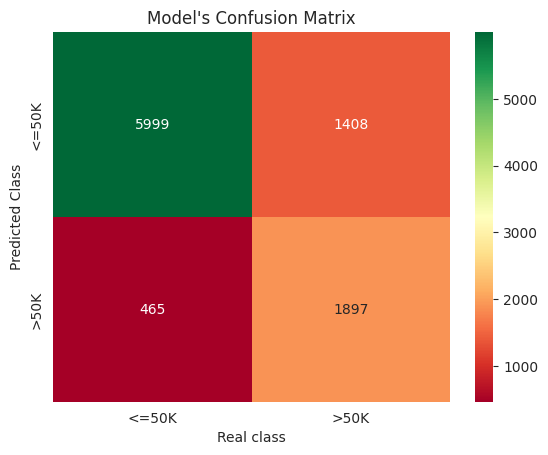

In [450]:
confusion_matrix_df = confusion_matrix(Y_test, Y_pred, labels=Y_test.value_counts().index)
confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df, columns=Y_test.value_counts().index,
                                 index=Y_test.value_counts().index)
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='RdYlGn')
plt.title("Model's Confusion Matrix")
plt.xlabel('Real class')
plt.ylabel('Predicted Class')
plt.show()

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [451]:
X = df.drop(['race'], axis=1)
Y = df['race']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

categorical = [column for column in X_train.columns if X_train[column].dtypes == object]

for column in categorical:
    if X_train[column].isnull().mean() > 0:
        for data_frame in [X_train, X_test]:
            data_frame[column].fillna(X_train[column].mode()[0], inplace=True)

for data_frame in [Y_train, Y_test]:
    data_frame.fillna(Y_train.mode()[0], inplace=True)

In [452]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'income'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: Future

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,1,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,1
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,1,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,1
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,1


In [453]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,1
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,1
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,1,0


In [454]:
columns = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[columns])
X_test = pd.DataFrame(X_test, columns=[columns])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [455]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
Y_pred

array(['Black', 'White', 'White', ..., 'White', 'White', 'Black'],
      dtype='<U18')

In [456]:
Y_test.value_counts()

White                 8388
Black                  911
Asian-Pac-Islander     318
Amer-Indian-Eskimo      80
Other                   72
Name: race, dtype: int64

In [457]:
null_hypothesis = 8388 / Y_test.value_counts().sum()

print('Model accuracy for training data {:.4f}'.format(gnb.score(X_train, Y_train)))
print('Model accuracy for test data: {:.4f}'.format(gnb.score(X_test, Y_test)))
print('Accuracy of the null hypothesis: {0:0.4f}'.format(null_hypothesis))

Model accuracy for training data 0.6763
Model accuracy for test data: 0.6721
Accuracy of the null hypothesis: 0.8586


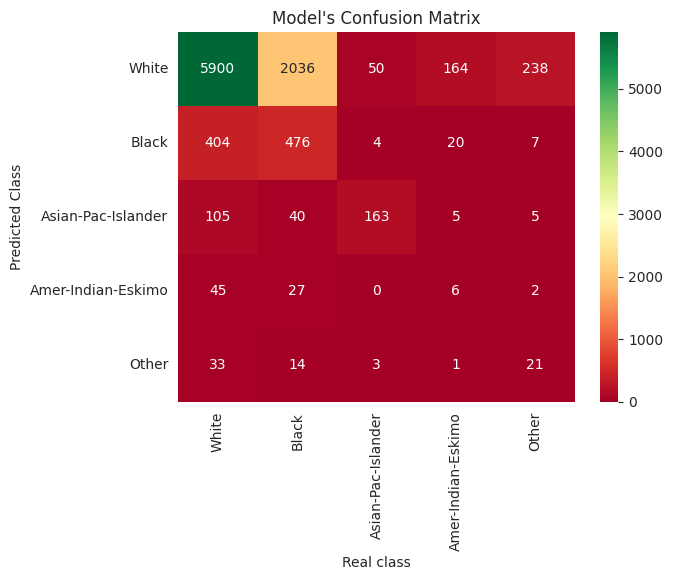

In [458]:
confusion_matrix_df = confusion_matrix(Y_test, Y_pred, labels=Y_test.value_counts().index)
confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df, columns=Y_test.value_counts().index,
                                 index=Y_test.value_counts().index)
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='RdYlGn')
plt.title("Model's Confusion Matrix")
plt.xlabel('Real class')
plt.ylabel('Predicted Class')
plt.show()

In [459]:
X = df.drop(['native_country'], axis=1)
Y = df['native_country']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

categorical = [column for column in X_train.columns if X_train[column].dtypes == object]

for column in categorical:
    if X_train[column].isnull().mean() > 0:
        for data_frame in [X_train, X_test]:
            data_frame[column].fillna(X_train[column].mode()[0], inplace=True)

for data_frame in [Y_train, Y_test]:
    data_frame.fillna(Y_train.mode()[0], inplace=True)

In [460]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'income'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/daniel/.local/lib/python3.9/site-packages/category_encoders/one_hot.py:145: Future

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,1,0,7298,0,60,1,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,1,1831,0,38,0,1
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,1,0,0,0,50,1,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,1,0,0,0,40,0,1
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,1,0,0,0,25,0,1


In [461]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,1,0,0,44,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,1,0,0,40,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,1,0,0,0,40,0,1
16505,46,1,0,0,0,0,0,0,0,147640,...,0,1,0,1,0,0,1902,40,0,1
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,1,0,0,2824,76,1,0


In [462]:
columns = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[columns])
X_test = pd.DataFrame(X_test, columns=[columns])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,7298.0,0.0,4.0,1.0,-1.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,-1.0,1.0,1831.0,0.0,-0.4,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-1.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0


In [463]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
Y_pred

array(['Outlying-US(Guam-USVI-etc)', 'Outlying-US(Guam-USVI-etc)',
       'Yugoslavia', ..., 'Japan', 'Yugoslavia', 'Scotland'], dtype='<U26')

In [464]:
Y_test.value_counts()

United-States                 8892
Mexico                         208
Philippines                     73
Germany                         49
El-Salvador                     37
Canada                          37
India                           31
Puerto-Rico                     30
England                         29
Vietnam                         27
Jamaica                         26
Italy                           25
Cuba                            25
Dominican-Republic              23
South                           22
Poland                          22
Japan                           19
China                           17
Guatemala                       16
Iran                            13
Columbia                        13
Taiwan                          13
Nicaragua                       12
Haiti                           12
Greece                          10
Hong                             9
France                           9
Peru                             8
Ireland             

In [465]:
null_hypothesis = 8892 / Y_test.value_counts().sum()

print('Model accuracy for training data {:.4f}'.format(gnb.score(X_train, Y_train)))
print('Model accuracy for test data: {:.4f}'.format(gnb.score(X_test, Y_test)))
print('Accuracy of the null hypothesis: {0:0.4f}'.format(null_hypothesis))

Model accuracy for training data 0.0129
Model accuracy for test data: 0.0087
Accuracy of the null hypothesis: 0.9102


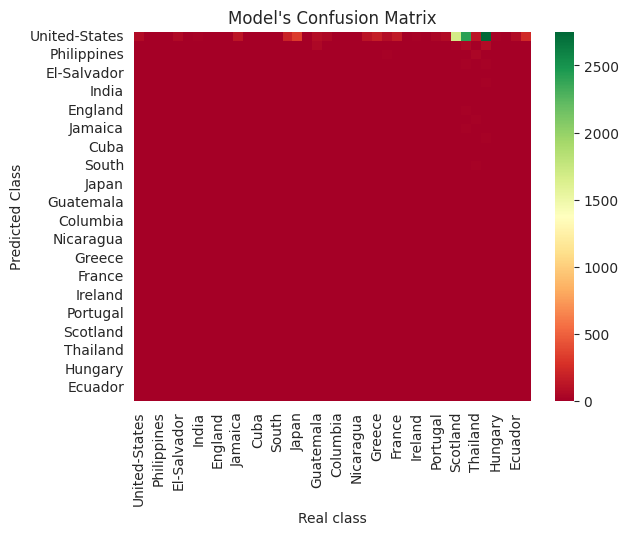

In [466]:
confusion_matrix_df = confusion_matrix(Y_test, Y_pred, labels=Y_test.value_counts().index)
confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df, columns=Y_test.value_counts().index,
                                 index=Y_test.value_counts().index)
sns.heatmap(confusion_matrix_df, annot=False, fmt='d', cmap='RdYlGn')
plt.title("Model's Confusion Matrix")
plt.xlabel('Real class')
plt.ylabel('Predicted Class')
plt.show()

Dokładność dla pierwszego klasyfikatora odpowiadającemu określeniu przychodu jest na poziomie około 80%, gdzie wartość hipotezy zerowej jest na poziomie 75%. Można więc stwierdzić, że klasyfikator dobrze dopasowuje czy dana osoba zarabia powyżej/poniżej 50 tysięcy dolarów rocznie.

Drugi klasyfikator dla rozpoznawania dokładności człowieka cechuje się już mniejszą dokładnością na poziomie 67%, gdzie wartość hipotezy zerowej wynosi 85%. Więc większą skuteczność uzyskalibyśmy, gdyby założyć, że wszystkie osoby ze zbioru testowego są białe.

Ostatni klasyfikator do rozpoznania pochodzenia posiada bardzo złą dokładność, na poziomie 1% co sprawia, że jest od nieprzystosowany do jakiegokolwiek użytku.